# Global Terrorism Dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/rajath/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['size']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [17]:
orig_data = pd.read_csv("globalterrorismdb_0617dist.csv",encoding = "ISO-8859-1",usecols=[0,1,2,3,5,8,10,12,22,24,26,27,29,35,58,68,98,130])
#orig_data.head()

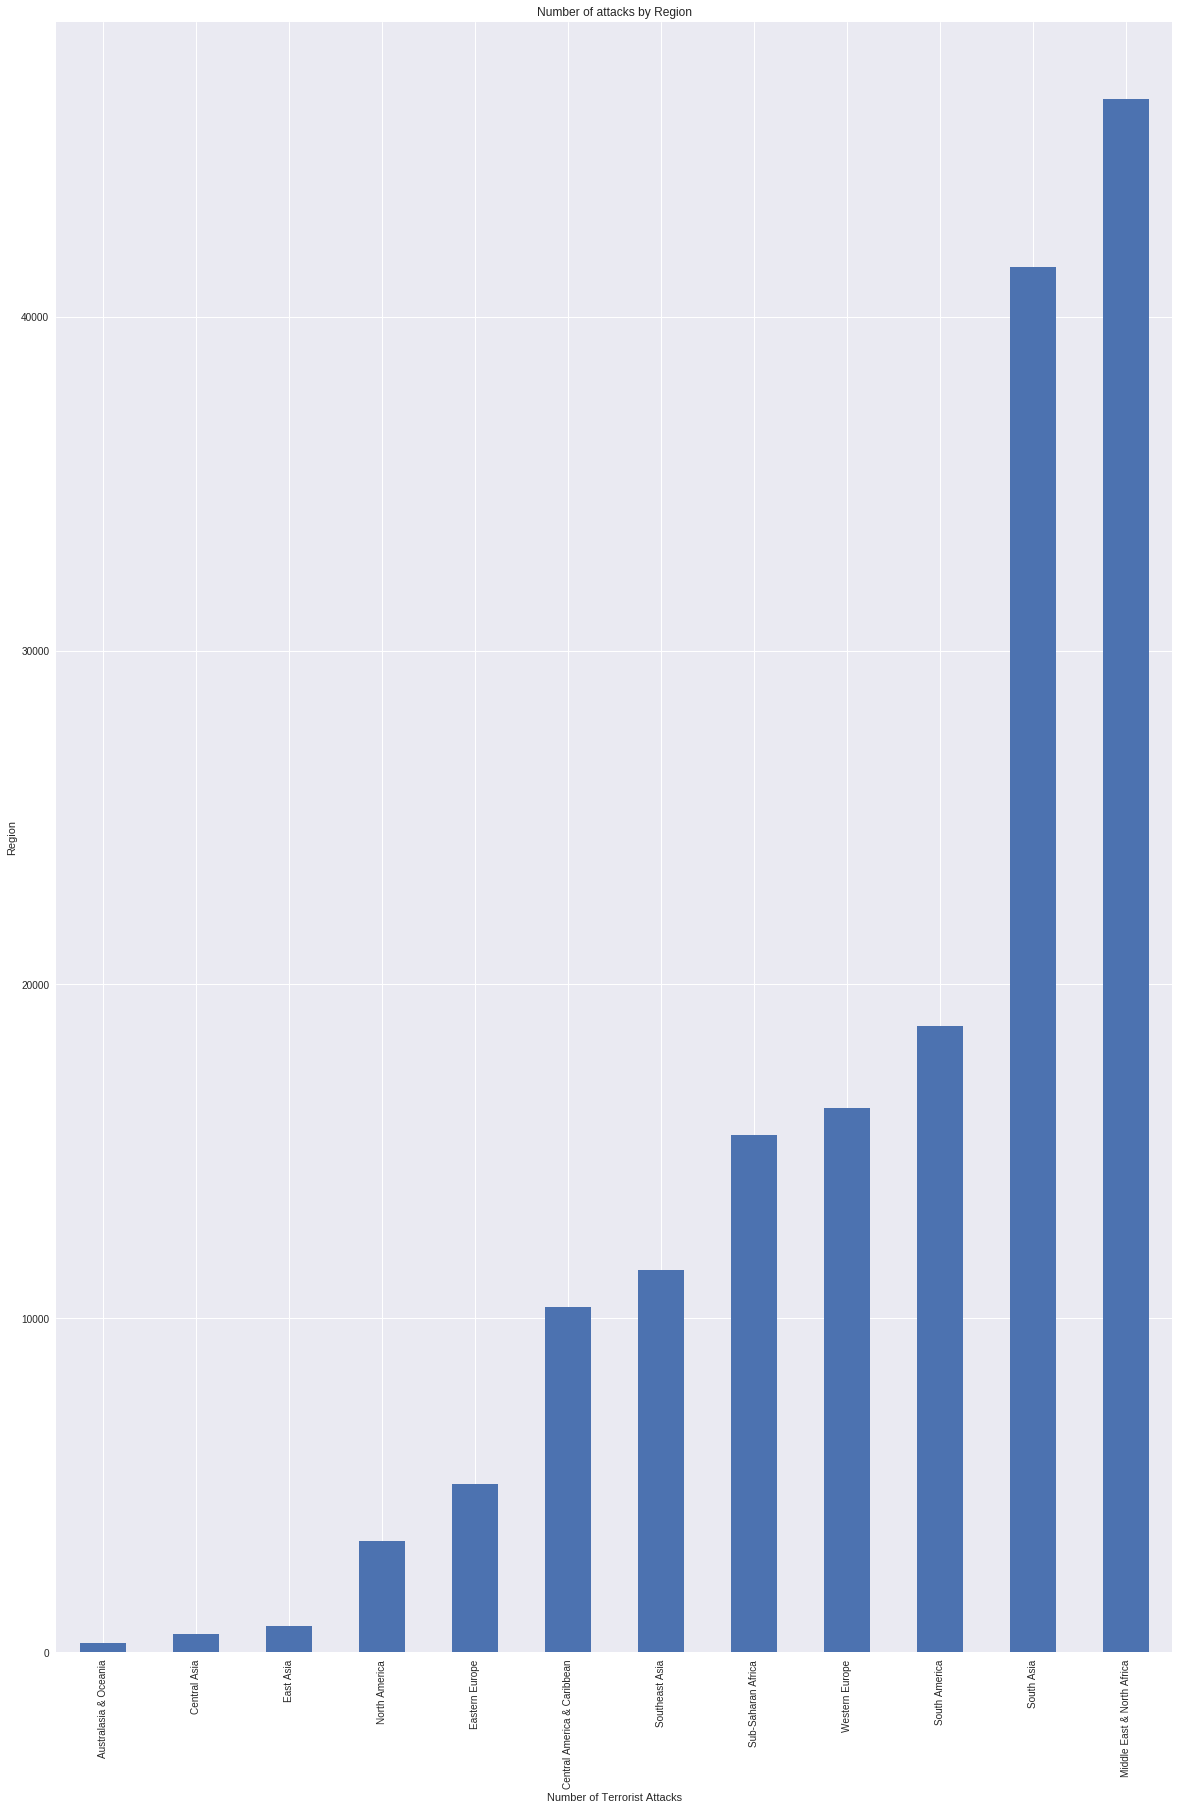

In [18]:
plt.figure(figsize=(20,30))
orig_data.groupby([orig_data['region_txt']]).size().sort_values(ascending=True).plot(kind='bar')
plt.title('Number of attacks by Region')
plt.ylabel('Region')
plt.xlabel('Number of Terrorist Attacks')
plt.show()

In [19]:
## New data includes only tuples in MiddleEast and NorthAfrica

new_data = orig_data[orig_data.region_txt == 'Middle East & North Africa']
#new_data.head()

In [20]:
# Compute Null percentage of each feature.
new_data_null = (new_data.isnull().sum() / new_data.shape[0]) * 100

new_data_null[new_data_null > 0]


city                0.070951
alternative_txt    83.115822
nkill               4.355959
dtype: float64

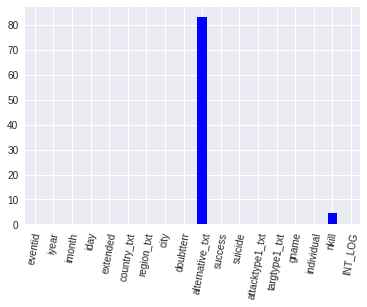

In [21]:
new_data_null.plot(kind="bar",color="blue",rot=80)

In [22]:
##Filling missing values for alternative_txt

new_data['alternative_txt'].fillna("Terrorist_attack", inplace=True)


/home/rajath/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [23]:
##Finding class average for nkill of same country


countries = new_data.country_txt.unique()
size=countries.shape[0]
dictionary = dict()
for i in range(size):
    df = orig_data[orig_data.country_txt == countries[i]]
    averg = round(df["nkill"].mean())
    dictionary[countries[i]] = averg


In [24]:
##Filling missing value for nkill with class average

data_size = new_data.shape[0]
for i in range(data_size):
    if pd.isnull(new_data.iloc[i,17]):
        new_data.iloc[i,17] = dictionary[new_data.iloc[i,5]]


new_data['nkill'].fillna(1, inplace=True)

new_data.head()

/home/rajath/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,doubtterr,alternative_txt,success,suicide,attacktype1_txt,targtype1_txt,gname,individual,nkill,INT_LOG
95,197002280001,1970,2,28,0,Jordan,Middle East & North Africa,Hebron,-9,Terrorist_attack,1,0,Armed Assault,Tourists,Unknown,0,1.0,-9
133,197003140002,1970,3,14,0,Egypt,Middle East & North Africa,Alexandria,0,Terrorist_attack,1,0,Bombing/Explosion,Airports & Aircraft,Unknown,0,0.0,-9
158,197003290002,1970,3,29,0,Lebanon,Middle East & North Africa,Beirut,0,Terrorist_attack,1,0,Bombing/Explosion,Government (Diplomatic),Popular Front for the Liberation of Palestine ...,0,0.0,0
195,197004150001,1970,4,15,0,Jordan,Middle East & North Africa,Amman,0,Terrorist_attack,1,0,Bombing/Explosion,Government (Diplomatic),Popular Front for the Liberation of Palestine ...,0,0.0,0
226,197004250001,1970,4,25,0,Turkey,Middle East & North Africa,Istanbul,0,Terrorist_attack,1,0,Bombing/Explosion,Airports & Aircraft,Palestinians,0,0.0,1


In [25]:
##Filtering tuples based on no. of repeatation of cities
#Threshold
filtered=new_data.groupby('city').filter(lambda x: len(x) > 250)
filtered.tail()


,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,doubtterr,alternative_txt,success,suicide,attacktype1_txt,targtype1_txt,gname,individual,nkill,INT_LOG
170333,201612310027,2016,12,31,0,Iraq,Middle East & North Africa,Baghdad,0,Terrorist_attack,1,1,Bombing/Explosion,Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),0,15.0,0
170334,201612310028,2016,12,31,0,Iraq,Middle East & North Africa,Baghdad,0,Terrorist_attack,1,1,Bombing/Explosion,Private Citizens & Property,Islamic State of Iraq and the Levant (ISIL),0,15.0,0
170335,201612310029,2016,12,31,0,Iraq,Middle East & North Africa,Baghdad,0,Terrorist_attack,1,0,Bombing/Explosion,Private Citizens & Property,Unknown,0,4.0,-9
170336,201612310030,2016,12,31,0,Iraq,Middle East & North Africa,Baghdad,0,Terrorist_attack,1,0,Bombing/Explosion,Private Citizens & Property,Unknown,0,1.0,-9
170337,201612310031,2016,12,31,0,Iraq,Middle East & North Africa,Mosul,1,Insurgency/Guerilla Action,0,1,Bombing/Explosion,Military,Islamic State of Iraq and the Levant (ISIL),0,1.0,0


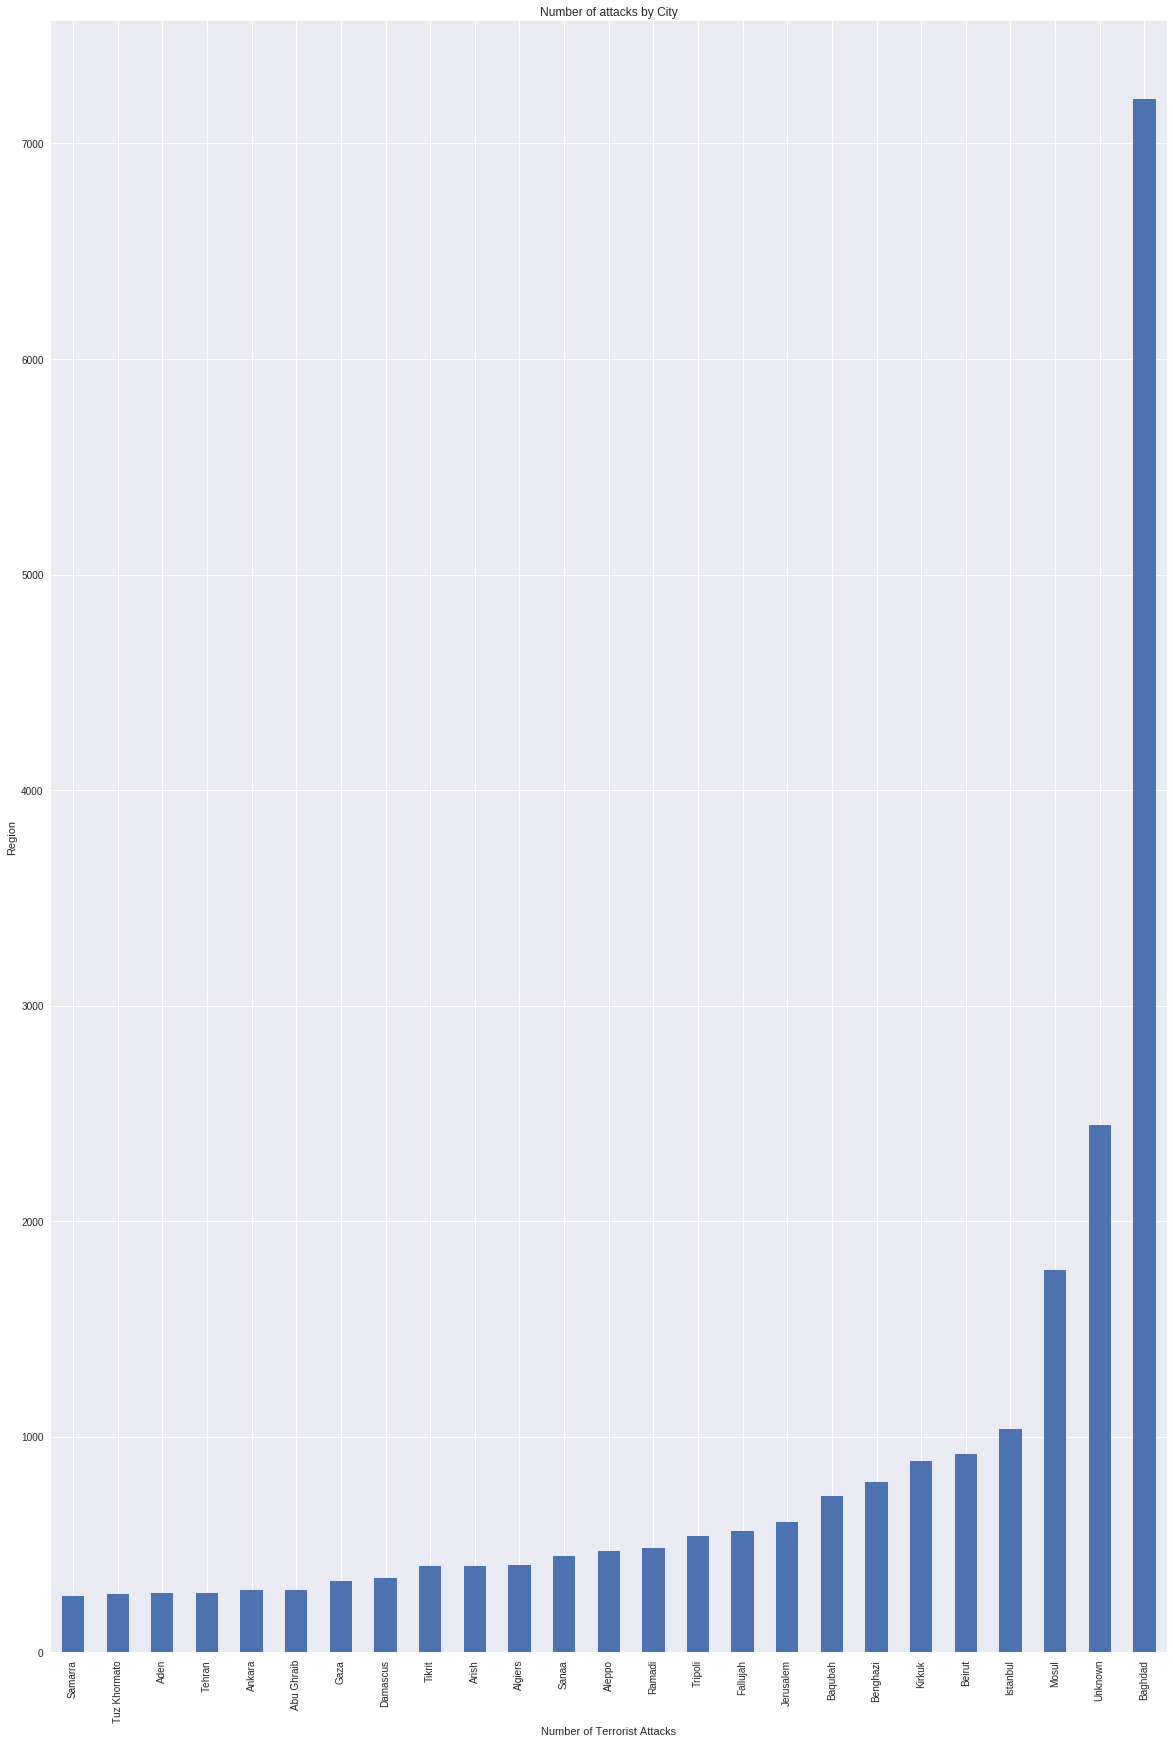

In [26]:
plt.figure(figsize=(20,30))
filtered.groupby([filtered['city']]).size().sort_values(ascending=True).plot(kind='bar')
plt.title('Number of attacks by City')
plt.ylabel('Region')
plt.xlabel('Number of Terrorist Attacks')
plt.show()

In [27]:
# User defined One Hot Encoding function

filtered.to_csv('refrence.csv')

def convert_to_binary(df,column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())
    print(categories)
    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:10] + '_' + cat_name[:30]
        print(col_name)
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df


In [28]:
## One Hot Encoding

print("One Hot Encoding categorical data...")
columns_to_convert = [ 'city', 'alternative_txt', 'attacktype1_txt', 'targtype1_txt', 'gname']
#columns_to_convert = ['city']
for column in columns_to_convert:
    filtered = convert_to_binary(df=filtered , column_to_convert=column)
    filtered.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...completed")
filtered.head()

One Hot Encoding categorical data...
['Beirut', 'Istanbul', 'Tehran', 'Ankara', 'Unknown', 'Aden', 'Jerusalem', 'Gaza', 'Algiers', 'Sanaa', 'Aleppo', 'Mosul', 'Baghdad', 'Tripoli', 'Damascus', 'Kirkuk', 'Benghazi', 'Ramadi', 'Samarra', 'Baqubah', 'Fallujah', 'Abu Ghraib', 'Tikrit', 'Tuz Khormato', 'Arish']
city_beirut
city_istanbul
city_tehran


/home/rajath/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/home/rajath/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


city_ankara
city_unknown
city_aden
city_jerusalem
city_gaza
city_algiers
city_sanaa
city_aleppo
city_mosul
city_baghdad
city_tripoli
city_damascus
city_kirkuk
city_benghazi
city_ramadi
city_samarra
city_baqubah
city_fallujah
city_abu_ghraib
city_tikrit
city_tuz_khormato
city_arish
['Terrorist_attack', 'Insurgency/Guerilla Action', 'Intra/Inter-group Conflict', 'Other Crime Type', 'Lack of Intentionality', 'State Actors']

/home/rajath/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  



alternativ_terrorist_attack
alternativ_insurgency_guerilla_action
alternativ_intra_intergroup_conflict
alternativ_other_crime_type
alternativ_lack_of_intentionality
alternativ_state_actors
['Bombing/Explosion', 'Armed Assault', 'Hijacking', 'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack', 'Assassination', 'Hostage Taking (Barricade Incident)', 'Unknown', 'Unarmed Assault']
attacktype_bombing_explosion
attacktype_armed_assault
attacktype_hijacking
attacktype_hostage_taking_kidnapping
attacktype_facility_infrastructure_attack
attacktype_assassination
attacktype_hostage_taking_barricade_incid
attacktype_unknown
attacktype_unarmed_assault
['Government (Diplomatic)', 'Airports & Aircraft', 'Military', 'Business', 'Police', 'Government (General)', 'Private Citizens & Property', 'Educational Institution', 'Journalists & Media', 'Utilities', 'Maritime', 'Tourists', 'NGO', 'Religious Figures/Institutions', 'Terrorists/Non-State Militia', 'Unknown', 'Violent Political Party', 'T

gname_popular_front_for_the_liberati
gname_palestinians
gname_unknown
gname_turkish_people's_liberation_ar
gname_siah_kal
gname_iranians
gname_ryf
gname_black_september
gname_turkish_leftists
gname_mujahedine_khalq_mek
gname_lebanese_socialist_revolutiona
gname_jewish_defense_league_jdl
gname_arabs
gname_revolutionary_arab_youth_organ
gname_arab_communist_organization
gname_democratic_front_for_the_liber
gname_armenian_secret_army_for_the_l
gname_prisoner__gourgen_yanikian_gro
gname_mahir_cayan_suicide_group
gname_international_revolutionary_ac
gname_polisario_front
gname_socialist_labor_party_of_leban
gname_abu_nidal_organization_ano
gname_turkish_people's_liberation_fr
gname_marxistleninist_armed_propagan
gname_28_may_armenian_organization
gname_south_moluccans
gname_alfatah
gname_ahmad_jibril
gname_rightwing_group
gname_lebanese_free_will_movement
gname_right_wing_christian_extremist
gname_shia_muslim_extremists
gname_fighters_for_the_liberation_of
gname_fedayeen_khalq_people's_comm

gname_ansar_alsunna
gname_al_zawahiri_loyalists
gname_alqaida_in_iraq
gname_1920_revolution_brigades
gname_ansar_aljihad
gname_mujahedeen_army
gname_islamic_movement_of_iraqi_muja
gname_liberals_of_galilee
gname_islamic_jihad_brigades
gname_protectors_of_islam_brigade
gname_omar_bin_khattab_group
gname_alshabaab_almu'minin
gname_mujahedeen_shura_council
gname_junaid_jihadist_battalion
gname_badr_brigades
gname_alahwaz_arab_people's_democrat
gname_jaish_alta'ifa_almansura
gname_jundallah_iran
gname_revenge_brigade
gname_alqaida_in_lebanon
gname_kurdish_separatists
gname_banner_of_islam
gname_sunni_supporters
gname_army_of_islam
gname_jaishemohammad_iraq
gname_jund_alsahabah_group
gname_islamic_companies
gname_mahdi_army
gname_jund_alsham_for_tawhid_and_jih
gname_islamic_swords_of_justice_in_t
gname_salafi_abubakr_alsiddiq_army
gname_islamic_state_of_iraq_isi
gname_alqaida_in_the_islamic_maghreb
gname_asa'ib_ahl_alhaqq
gname_anbar_salvation_council
gname_just_punishment_brigades
gname_al

,eventid,iyear,imonth,iday,extended,country_txt,region_txt,doubtterr,success,suicide,...,gname_jaish_almujahideen_syria,gname_league_of_damascus_for_special,gname_the_78_unemployed,gname_authenticity_and_development_f,gname_justice_and_equality_movement_,gname_jihadiinspired_extremists,gname_ajnad_alsham,gname_turkestan_islamic_party,gname_khaled_ibn_alwalid_army,gname_the_independent_military_wing_
158,197003290002,1970,3,29,0,Lebanon,Middle East & North Africa,0,1,0,...,0,0,0,0,0,0,0,0,0,0
226,197004250001,1970,4,25,0,Turkey,Middle East & North Africa,0,1,0,...,0,0,0,0,0,0,0,0,0,0
334,197006090002,1970,6,9,0,Iran,Middle East & North Africa,0,1,0,...,0,0,0,0,0,0,0,0,0,0
342,197006110002,1970,6,11,0,Iran,Middle East & North Africa,0,1,0,...,0,0,0,0,0,0,0,0,0,0
486,197008310001,1970,8,31,0,Turkey,Middle East & North Africa,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
filtered.set_index('eventid', inplace=True)
filtered.head()

,iyear,imonth,iday,extended,country_txt,region_txt,doubtterr,success,suicide,individual,...,gname_jaish_almujahideen_syria,gname_league_of_damascus_for_special,gname_the_78_unemployed,gname_authenticity_and_development_f,gname_justice_and_equality_movement_,gname_jihadiinspired_extremists,gname_ajnad_alsham,gname_turkestan_islamic_party,gname_khaled_ibn_alwalid_army,gname_the_independent_military_wing_
eventid,,,,,,,,,,,,,,,,,,,,,
197003290002,1970,3,29,0,Lebanon,Middle East & North Africa,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
197004250001,1970,4,25,0,Turkey,Middle East & North Africa,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
197006090002,1970,6,9,0,Iran,Middle East & North Africa,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
197006110002,1970,6,11,0,Iran,Middle East & North Africa,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
197008310001,1970,8,31,0,Turkey,Middle East & North Africa,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
filtered.to_csv('preprocessed.csv')